Table of Contents
<div id="toc"></div>

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

# About the Dataset

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.


***Source: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants***

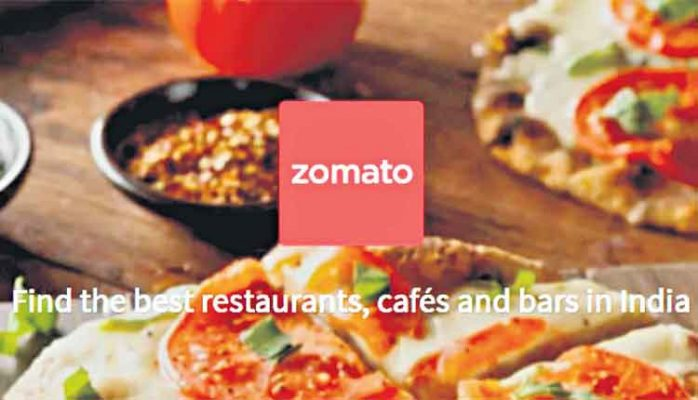


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Problem Statement

The provided dataset is taken from famous restaurant booking and food delivery app called Zomato for Bangalore city which is a huge IT hub of India. This dataset has interesting features consolidated in one place like rating, approx cost, location, etc.
The aim of analyzing given dataset is to get insights in terms of popular locations, rating, cost, etc required for opening a restaurant/service in Bangalore.

# Imports

**Data Operations: pandas, numpy**

**Visualizations: seaborn, matplotlib**

**Interactive Visualizations: plotly**

**Interactive Map Visualizations: folium**


In [ ]:
#importing all the modules/packages
import pandas as pd #Data operations
import numpy as np #Array and Data operations

import seaborn as sns #Visualization library
import matplotlib.pyplot as plt #Plot library

from plotly import tools #Interavtive Visualization library
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

import folium #Interactive Maps Visualization library
import geopy

import warnings #for filtering warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#reading the CSV file from local
data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
#Getting information about the data
data.info()

# Data Cleaning

Data Standardization, Cleaning and Deduplication


In [ ]:
data= data.drop(['url','address','reviews_list','listed_in(city)','menu_item'],axis=1) #drop unwanted columns

data=data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(type)':'type'}) #rename columns for convinience

data['online_order']= data['online_order'].apply(lambda a: '1' if str(a)=='Yes' else '0') 
data['online_order']= data['online_order'].astype('int') #Changing categorical features for statstical computation

data['book_table']=data['book_table'].apply(lambda b: '1' if str(b)=='Yes' else '0')
data['book_table']= data['book_table'].astype('int') #Changing categorical features for statstical computation

data['rate']=data['rate'].apply(lambda c: str(c).split('/')[0]) #data formatting
data['approx_cost']=data['approx_cost'].apply(lambda d: str(d).replace(',',''))

data.dropna(subset=['rate','approx_cost','phone','dish_liked']) #dropping null values and cleaning data
data=data[data['rate']!='nan']
data=data[data['rate']!='NEW']
data=data[data['rate']!='-']
data=data[data['approx_cost']!='nan']

data['rate']=data['rate'].astype(float) #Changing datatype of features for statstical computation
data['votes']=data['votes'].astype(int) #Changing datatype of features for statstical computation
data['approx_cost']=data['approx_cost'].astype(int) #Changing datatype of features for statstical computation

data['phone']=data['phone'].apply(lambda f: '2' if len(str(f))>12 else '1') 
data['phone']=data['phone'].astype('int')#Changing categorical features for statstical computation


In [ ]:
data.info() 

# Statistics based Visualizations

In [ ]:
print('Histogram from data : ')
data.hist(figsize=(10,8))
plt.show()


In [ ]:
#PDF Histogram Plots

sns.FacetGrid(data, hue="book_table").map(sns.distplot, "rate").add_legend()
plt.show()

sns.FacetGrid(data, hue="online_order").map(sns.distplot, "rate").add_legend()
plt.show()

sns.FacetGrid(data, hue="book_table").map(sns.distplot, "approx_cost").add_legend()
plt.show()

sns.FacetGrid(data, hue="online_order").map(sns.distplot, "approx_cost").add_legend()
plt.show()

**Histogram plots Observations:**
* Restaurants with high rating gets more table bookings
* Rating is not dependent for online orders 
* For higher approx costs, less tables are booked
* Online orders range upto rs.1000 for online orders

In [ ]:
#Pair Plots

plt.figure(figsize=(30,8))
sns.set_style('whitegrid')
sns.pairplot(data,hue="type",vars=['rate','votes','approx_cost'])
plt.title('Pair Plot')
plt.show()

**Pair plots Observations:**
* The data is highly overlapped so it is difficult to comment on the result, interactive visualizations in next slides would clarify the understandings.


In [ ]:
#SNS Histogram

plt.figure(figsize=(20,8))
sns.countplot(data['approx_cost'],hue='book_table',data=data)

In [ ]:
#SNS Histogram

plt.figure(figsize=(20,8))
sns.countplot(data['rate'],hue='online_order',data=data)

**Dual Histogram observations: **
* There are more online orders for rating between 3.6-4.1


**Conclusions from Statistical Analysis:**
* Delivery and Dine-out are preferred more than other types of restaurants in terms of cost for two people and rating
* Book Table feature is used extensively for most of the restaurants
* There are more online orders for rating between 3.6-4.1
* Famous locations: Whitefield, Banashankari, ITPL, Basavgunadi


# Interactive Visualizations

In [ ]:
#Interactive donut charts

labels = data.type

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=data.rate, name="Type based Rating"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=data.approx_cost, name="Type based cost"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart evaluation : Type based",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Rating', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Cost', x=0.79, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
#Interactive donut charts

labels = data.type

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=data.book_table, name="Book Table"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=data.approx_cost, name="Online order"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart evaluation : Booking based",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Book', x=0.21, y=0.5, font_size=20, showarrow=False),
                 dict(text='Online', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
#Interactive Histogram

fig = px.histogram(data, x='location')
fig.update_layout(
    title_text="Location Histogram")
fig.show()

In [ ]:
#Interactive Histogram

fig = px.histogram(data, x="location", color="type")
fig.update_layout(
    title_text="Location Histogram with Type as Hue")
fig.show()

In [ ]:
#Interactive scatter plot

fig = px.scatter(data, x="location", y="rate", color="type",size='approx_cost')
fig.update_layout(
    title_text="Scatter plot based on Type")
fig.show()


# References


* https://plot.ly/graphing-libraries/
* https://pypi.org/project/folium/
* https://matplotlib.org/3.1.1/contents.html
* https://scikit-learn.org/stable/documentation.html
* https://www.youtube.com/watch?v=vTFn9gWEtPA&list=LLXLE0rA0AG9b3jd-cLR8W1w&index=2&t=0s